In [8]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [9]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [10]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [11]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d


In [12]:
data = pgr_future.result()
data[0]

> PupilGrabber done grabbing 5 seconds of pupil.1.3d


{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.38088169112093473, 0.39333946776034756],
 'diameter': 47.95075824201052,
 'confidence': 0.7692609766045192,
 'timestamp': 773465.9894879999,
 'sphere': {'center': [1.4759330487700795,
   3.0457548359893045,
   44.65774413023611],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [105.21181058155977, 115.24178582980089],
  'axes': [157.4886997075214, 157.4886997075214],
  'angle': 0.0},
 'circle_3d': {'center': [-2.592711329461125,
   2.52265121709932,
   35.1093151742564],
  'normal': [-0.3915054878347739, -0.05033566919669999, -0.9187980046788172],
  'radius': 2.6637952733530676},
 'diameter_3d': 5.327590546706135,
 'ellipse': {'center': [73.12928469521947, 116.47882219001326],
  'axes': [43.70953137059531, 47.95075824201052],
  'angle': 179.97688873908737},
 'location': [73.12928469521947, 116.47882219001326],
 'model_confidence': 1.0,
 'theta': 1.6211532760060463,
 'phi': -1.97360352

Text(0.5, 0, 'Pupil timestamp (s)')

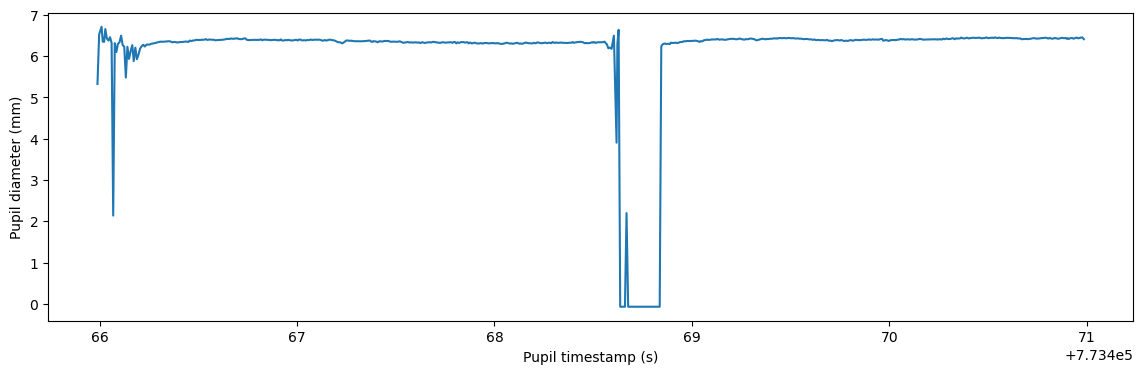

In [13]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')